In [1]:
# importing basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# getting the dataset
df= pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\Micro Credit Project\Data file.csv')

In [3]:
# taking a look at datset
pd.set_option('display.max_columns' ,None)      # To display all the columns value of dataset
df.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
# getting the dimension of dataset
df.shape

(209593, 37)

In [5]:
# Getting the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

The dataset looks good, with no null values, out of 37 columns, Only 'msisdn', 'pcircle','pdate' are categorical columns rest all are numericals. Our Label is already in numerical form. Let's find out the meaning of rest of the columns, so we can get clear idea, about which column denotes what.

In [6]:
# Let's import the sheet which has meaning of every column
xls=pd.ExcelFile(r'C:\Users\DELL\OneDrive\Documents\Micro Credit Project\Data_Description.xlsx')
sheet=pd.read_excel(xls,'Description')  # loading the Description of every column
sheet

,Variable,Definition,Comment
0,label,Flag indicating whether the user paid back the...,NaN
1,msisdn,mobile number of user,NaN
2,aon,age on cellular network in days,NaN
3,daily_decr30,"Daily amount spent from main account, averaged...",NaN
4,daily_decr90,"Daily amount spent from main account, averaged...",NaN
5,rental30,Average main account balance over last 30 days,Unsure of given definition
6,rental90,Average main account balance over last 90 days,Unsure of given definition
7,last_rech_date_ma,Number of days till last recharge of main account,NaN
8,last_rech_date_da,Number of days till last recharge of data account,NaN
9,last_rech_amt_ma,Amount of last recharge of main account (in In...,NaN


We can observe that Unnamed: 0 is index type of column with each unique value, we can drop it. We can also drop pcircle, as the entire dataset is about only one telecom circle (pcircle). for pdate let's convert it into some useful information.
Label is our Target Column, rest are features. msisdn is the mobile number of user,let's chcek if we got all different numbers 

In [7]:
# dropping not important columns.
df.drop(columns=['Unnamed: 0','pcircle'], axis=1, inplace=True)

In [8]:
# let's check for unique values
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

We can observe that the label has only two unique classes, indication defaulter/not defaulter. It is a classification problem with target variable as label. In mobile number of user we can see that there are some mobile number which are repeated in the columns.

In [9]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


we can observe that some of the columns has min vale as zero.



# Feature Engineering and EDA

1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

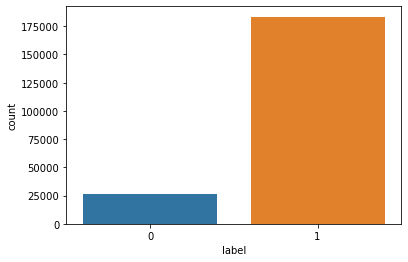

In [10]:
# let's see how our label data is distributed
print(df['label'].value_counts())
sns.countplot(df['label'])

We can observe that the value for '1' and '0' is highly imbalanced, the number of 0 is way less than number of 1. But as this data is provided by the telecom company itself, we will not use any over sampling technique to handle this imbalance and undersampling can lead to information loss. '1' indicates non defaulter, '0' indicates defaulter.

In [11]:
#sns.pairplot(df, hue='label')

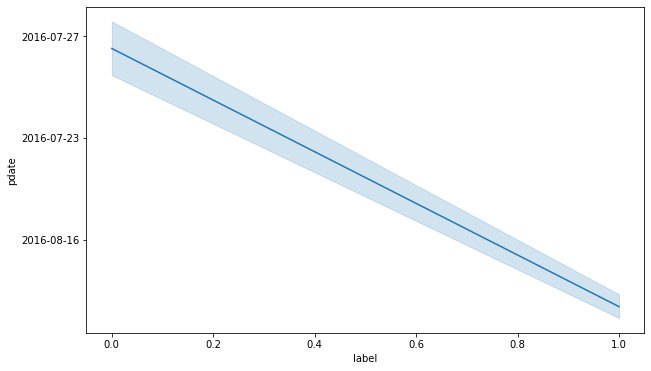

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(y='pdate', x='label', data=df)
plt.show()

We can observe that pdate has some connection with label, as certain date shows high values for zero while a very has high values for 1.

In [13]:
# Dividing continuous and categorical data
data_cat=df[[ 'msisdn','pdate']]

data_conti=df.drop(data_cat, axis=1)

print(data_cat.shape)
print(data_conti.shape)

(209593, 2)
(209593, 33)


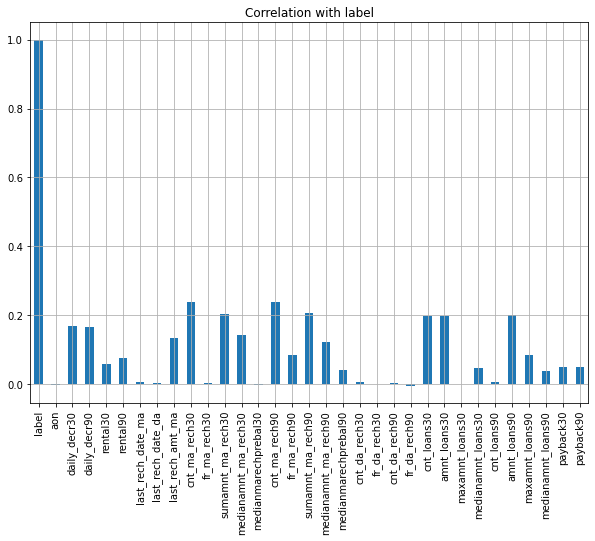

In [14]:
# Let's see how our continuous features are correlated with target varibale.
data_conti.corrwith(df.label).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with label")

plt.show()

We can observe that cnt_ma_rech30 and cn_ma_rech90 seems to be most correlated features with or target variable label. 

While aon, fr_da_rech30, maxamnt_loans30, medianmarechprebal30 are not atall correlated with label.
Other features like last_rech_date_ma, last_rech_date_da, fr_ma_rech30, cnt_da_rech30, cnt_da_rech90, fr_da_rech90 and cnt_loans90 also shows nearly zero correlation with label. 

Let's confirm it using correlation matrix, then we can drop these features columns with don't show any or nearly zero correlation with label.

In [15]:
# Let's check correlation of all the features and label
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


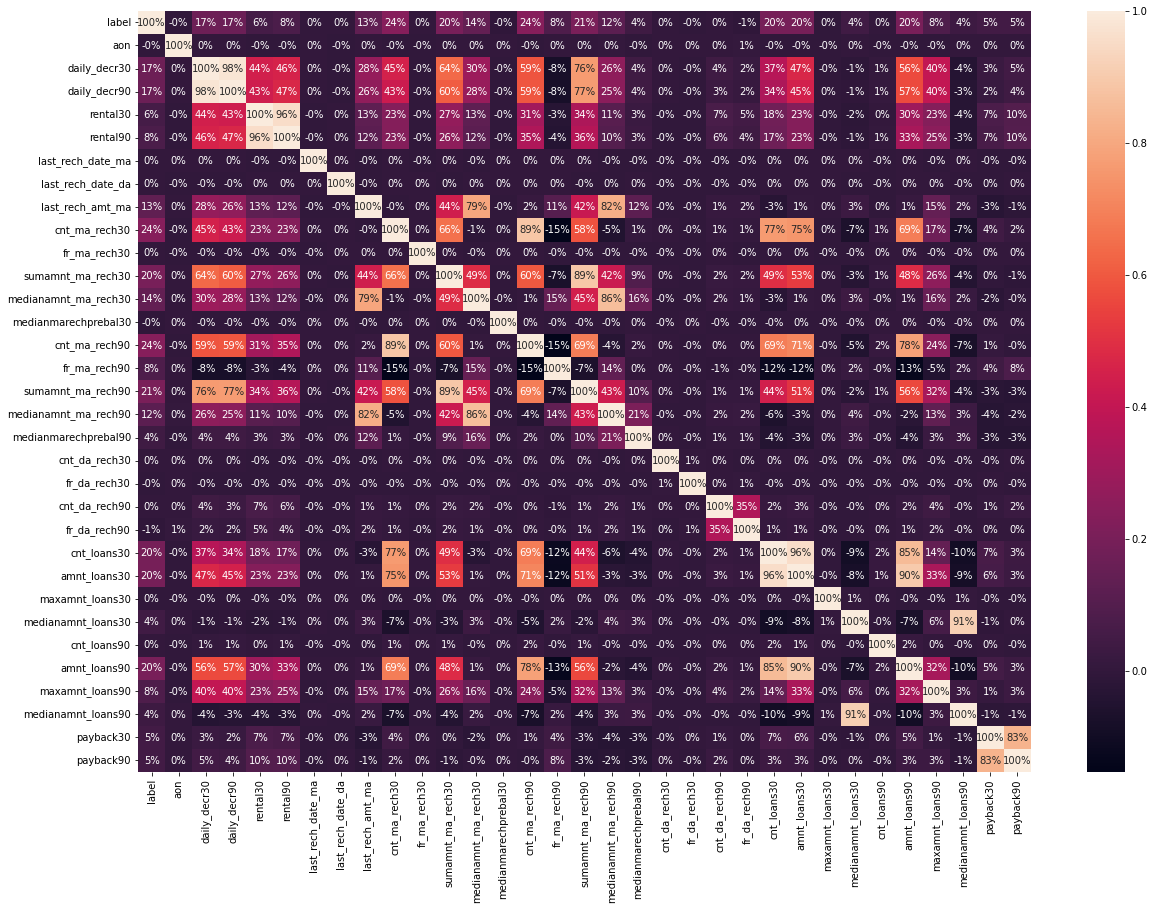

In [16]:
# let's visulaize it, using Heatmap
# plotting correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

Observations: From above observation it is clear that, there are few columns which are 0 or almost 0 % correlated tp label, so we will drop them for our ML model building.


These includes : 'cnt_loans90', 'maxamnt_loans30', 'cnt_da_rech90', 'fr_da_rech30', 'cnt_da_rech30', 'medianmarechprebal30', fr_ma_rech30', last_rech_date_ma', last_rech_date_da', 'aon'. we can drop these, as they are zero or almost 0% correlated with label.S


We can observe that some features shows strong correlation with each cnt_loans30 - amnt_loans30, daily_decr30 - daily_decr90, rental30- rental90, medianamnt_loans90- medianamt_loans30, sumamnt_ma_rech30 -sumamnt_ma_rech


In [17]:
# dropping not correlated columns
df.drop(columns=['cnt_loans90', 'maxamnt_loans30', 'cnt_da_rech90', 'fr_da_rech30', 'cnt_da_rech30', 
        'medianmarechprebal30', 'fr_ma_rech30', 'last_rech_date_ma', 'last_rech_date_da', 'aon'], axis=1, inplace=True)
df.shape

(209593, 25)

<AxesSubplot:xlabel='cnt_loans30', ylabel='amnt_loans30'>

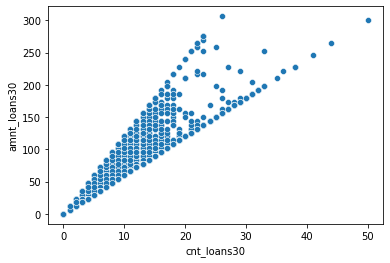

In [18]:
sns.scatterplot('cnt_loans30','amnt_loans30', data=df)

We can see positive correlation between the two.

<AxesSubplot:xlabel='daily_decr30', ylabel='daily_decr90'>

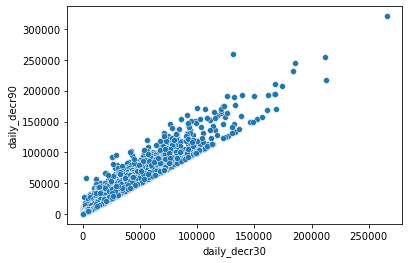

In [19]:
sns.scatterplot('daily_decr30', 'daily_decr90', data=df)

We can observe highly positive correlation between daily_decr90 and daily_decr30, we can drop one of them to avoid multicollinearity in the ML Model building.

<AxesSubplot:xlabel='rental30', ylabel='rental90'>

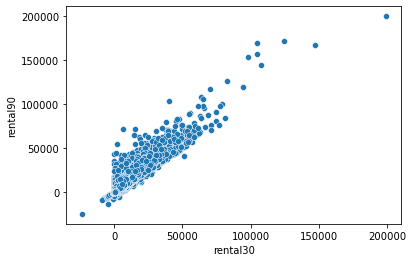

In [20]:
sns.scatterplot('rental30', 'rental90', data=df)

We can observe strong highly positive correlation between the two, we can drop one of them in order to reduce multicollinearity in our ML model building.

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='medianamnt_loans30'>

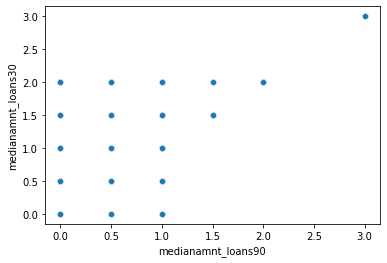

In [21]:
sns.scatterplot('medianamnt_loans90', 'medianamnt_loans30', data=df)

The correlation between above two features are not so clear using scatter plot, there is no definite relation exist between the two.

In [22]:
# dropping columns to reduce multicollinearity
df.drop(columns= ['daily_decr30', 'rental30'], axis=1, inplace=True)
df.shape

(209593, 23)

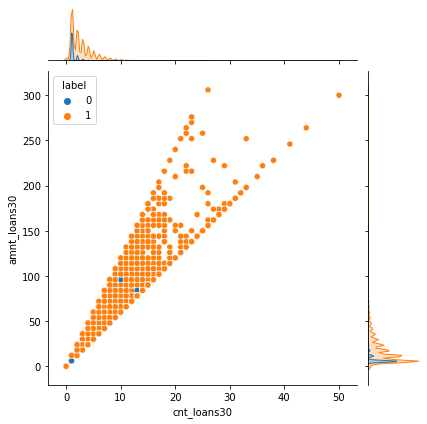

In [23]:
sns.jointplot('cnt_loans30','amnt_loans30', hue= 'label',data= df)

We can Observe that both are correlated , and there correlation with label seems to be the same. We can drop one of them.
Let's drop cnt_loans30

In [ ]:
df.drop('cnt_loans30', axis=1, inplace=True)

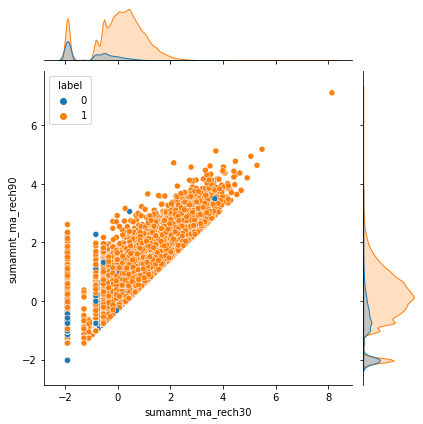

In [71]:
sns.jointplot('sumamnt_ma_rech30','sumamnt_ma_rech90', hue= 'label', data= df)

We can observe the positive correlation between them, as value of one increases , the value for other also increases. Also we can see they shows exact plots with label.

In [25]:
# let's covert pdate into useful information
df['Date']=df['pdate'].apply(lambda x:x.split('-')[2])
df['Month']=df['pdate'].apply(lambda x :x.split('-')[1])
df['Year']=df['pdate'].apply(lambda x :x.split('-')[0])

df.head(2)

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,Date,Month,Year
0,0,21408I70789,3065.15,260.13,1539,2,3078.0,1539.0,2,21,3078,1539.0,7.50,0,12,0.0,12,6,0.0,29.0,29.0,2016-07-20,20,07,2016
1,1,76462I70374,12124.75,3691.26,5787,1,5787.0,5787.0,1,0,5787,5787.0,61.04,0,12,0.0,12,12,0.0,0.0,0.0,2016-08-10,10,08,2016


In [26]:
#changing their type to integer
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

#drop pdate
df.drop('pdate',axis=1, inplace= True)

#printing the dataframe
df.head(2)

,label,msisdn,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Date,Month,Year
0,0,21408I70789,3065.15,260.13,1539,2,3078.0,1539.0,2,21,3078,1539.0,7.50,0,12,0.0,12,6,0.0,29.0,29.0,20,7,2016
1,1,76462I70374,12124.75,3691.26,5787,1,5787.0,5787.0,1,0,5787,5787.0,61.04,0,12,0.0,12,12,0.0,0.0,0.0,10,8,2016


<AxesSubplot:xlabel='Date', ylabel='Density'>

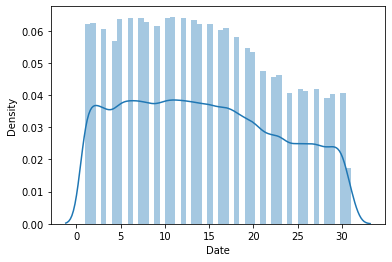

In [27]:
# let's see distribution of date/month/year column.
sns.distplot(df['Date'])

We can see the distribution of data over the 30 dates of calender.

<AxesSubplot:xlabel='Month', ylabel='Density'>

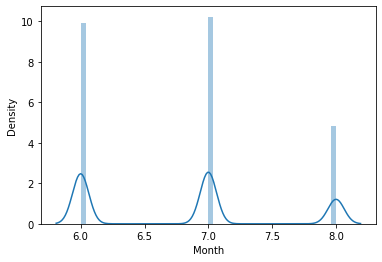

In [28]:
sns.distplot(df['Month'])

From above we can observe that we have data for 3 months mostly, june, july and august.
Out of which most of the data is from july and june.


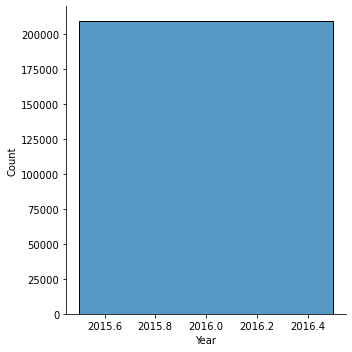

In [29]:
sns.displot(df['Year'])

We can observe that we have data of only one year, so we can drop this column


In [30]:
df.drop('Year', axis=1, inplace= True)
df.shape

(209593, 23)

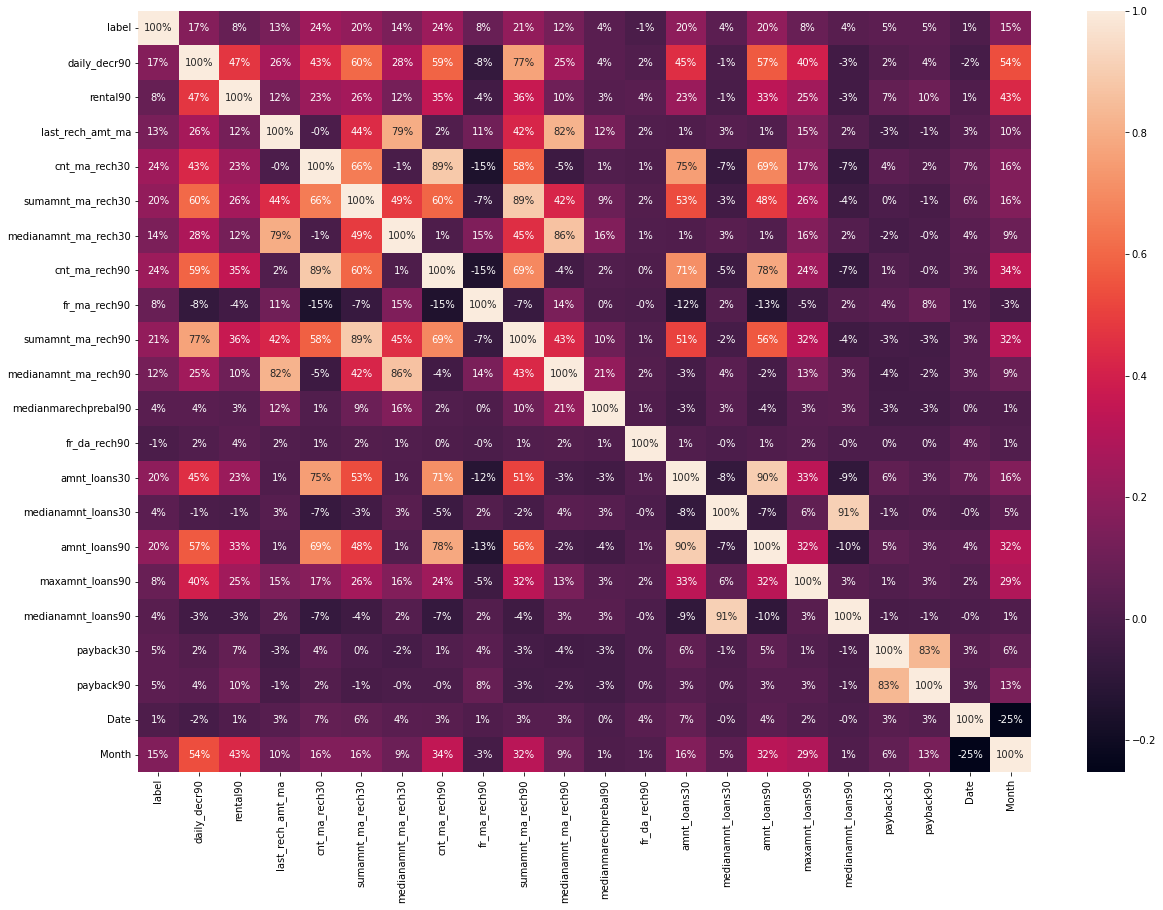

In [32]:
# let's one more time check for correlation
# let's visulaize it, using Heatmap
# plotting correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

So far, the data looks good. Let's go ahead and do some drop user mobile number column, as it is merely an information about user identity, like name etc. It is important for record keeping, but I don't think it is of any use for ML Model Building.

In [33]:
df.drop('msisdn', axis= 1, inplace = True)
df.shape

(209593, 22)

<AxesSubplot:xlabel='amnt_loans30', ylabel='amnt_loans90'>

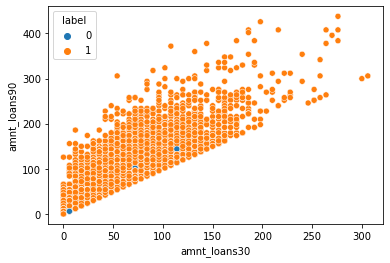

In [34]:
sns.scatterplot('amnt_loans30', 'amnt_loans90', hue= 'label', data=df)

We can observe that both of them are positively correlated, but the variation in the response is quite big, so will keep both of them whike going further.

In [35]:
# checking the data type of the dataframe in order to know if there is any other categorical column present in it.
df.dtypes

label                     int64
daily_decr90            float64
rental90                float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
fr_da_rech90              int64
amnt_loans30              int64
medianamnt_loans30      float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback30               float64
payback90               float64
Date                      int32
Month                     int32
dtype: object

We cn observe that all our values are in numerical form, which is a pre requisite for any ML model building. So, there is no need of encoding, let's move ahead with skewness and outliers.




# Skewness and Outlier detection and removal.

In [37]:
# LeT's chcek for skewness
df.skew()

label                   -2.270254
daily_decr90             4.252565
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
fr_da_rech90            28.988083
amnt_loans30             2.975719
medianamnt_loans30       4.551043
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
Date                     0.199845
Month                    0.343242
dtype: float64

We can Observe that, there is huge amount of skewness is present in the data

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

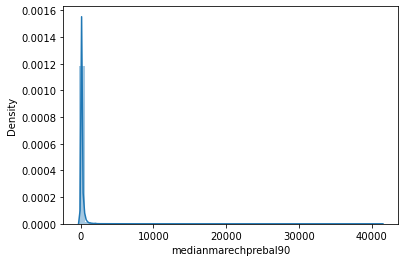

In [52]:
sns.distplot(df['medianmarechprebal90'])

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='label'>

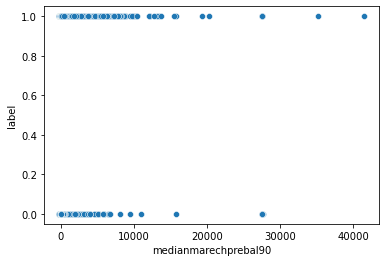

In [49]:
sns.scatterplot(x='medianmarechprebal90',y='label', data=df)

From above two plots it is clear that most of the values of medianmarechprebal90 lies around first heighest peak and has wide distibution after that, that might be counted as outlier here, but may be they are some valuable information, we need to be careful when removing outliers from here.

<AxesSubplot:xlabel='fr_da_rech90', ylabel='Density'>

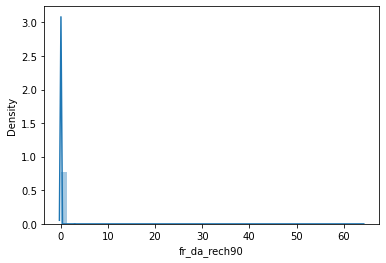

In [51]:
sns.distplot(df['fr_da_rech90'])

<AxesSubplot:xlabel='fr_da_rech90', ylabel='label'>

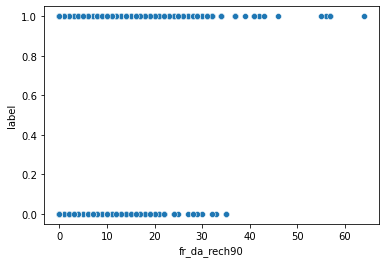

In [53]:
sns.scatterplot ('fr_da_rech90', 'label', data=df)

From above two plots it is clear that fr_da_rech90 has lots of outliers, but we can observe from the second plot that we got higher value for 1 in higher distribution, so they might be some useful info, we need to be extra careful while dealing with outliers.

In [54]:
# Let's perform Power Transformer in order to reduce skewness in our data
from sklearn.preprocessing import PowerTransformer
pwrTrans=PowerTransformer(method='yeo-johnson')  

# separating label and categorical data from dataframe in order to perform transformation
df_skew= df.drop(columns=['label', 'Date','Month'], axis=1) 
feature= df_skew.columns
df[feature]=pwrTrans.fit_transform(df[feature].values)


In [55]:
# checking for skewness one  more time
df.skew()

label                   -2.270254
daily_decr90            -7.080193
rental90                -0.962717
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     7.506286
fr_da_rech90            15.469700
amnt_loans30             0.001948
medianamnt_loans30       3.447735
amnt_loans90            -0.008988
maxamnt_loans90          0.364282
medianamnt_loans90       3.779598
payback30                0.298563
payback90                0.210887
Date                     0.199845
Month                    0.343242
dtype: float64

We can observe that skewness has been reduced to great decree, now we can move ahead with outliers detection.

For that we can use z score techniques.

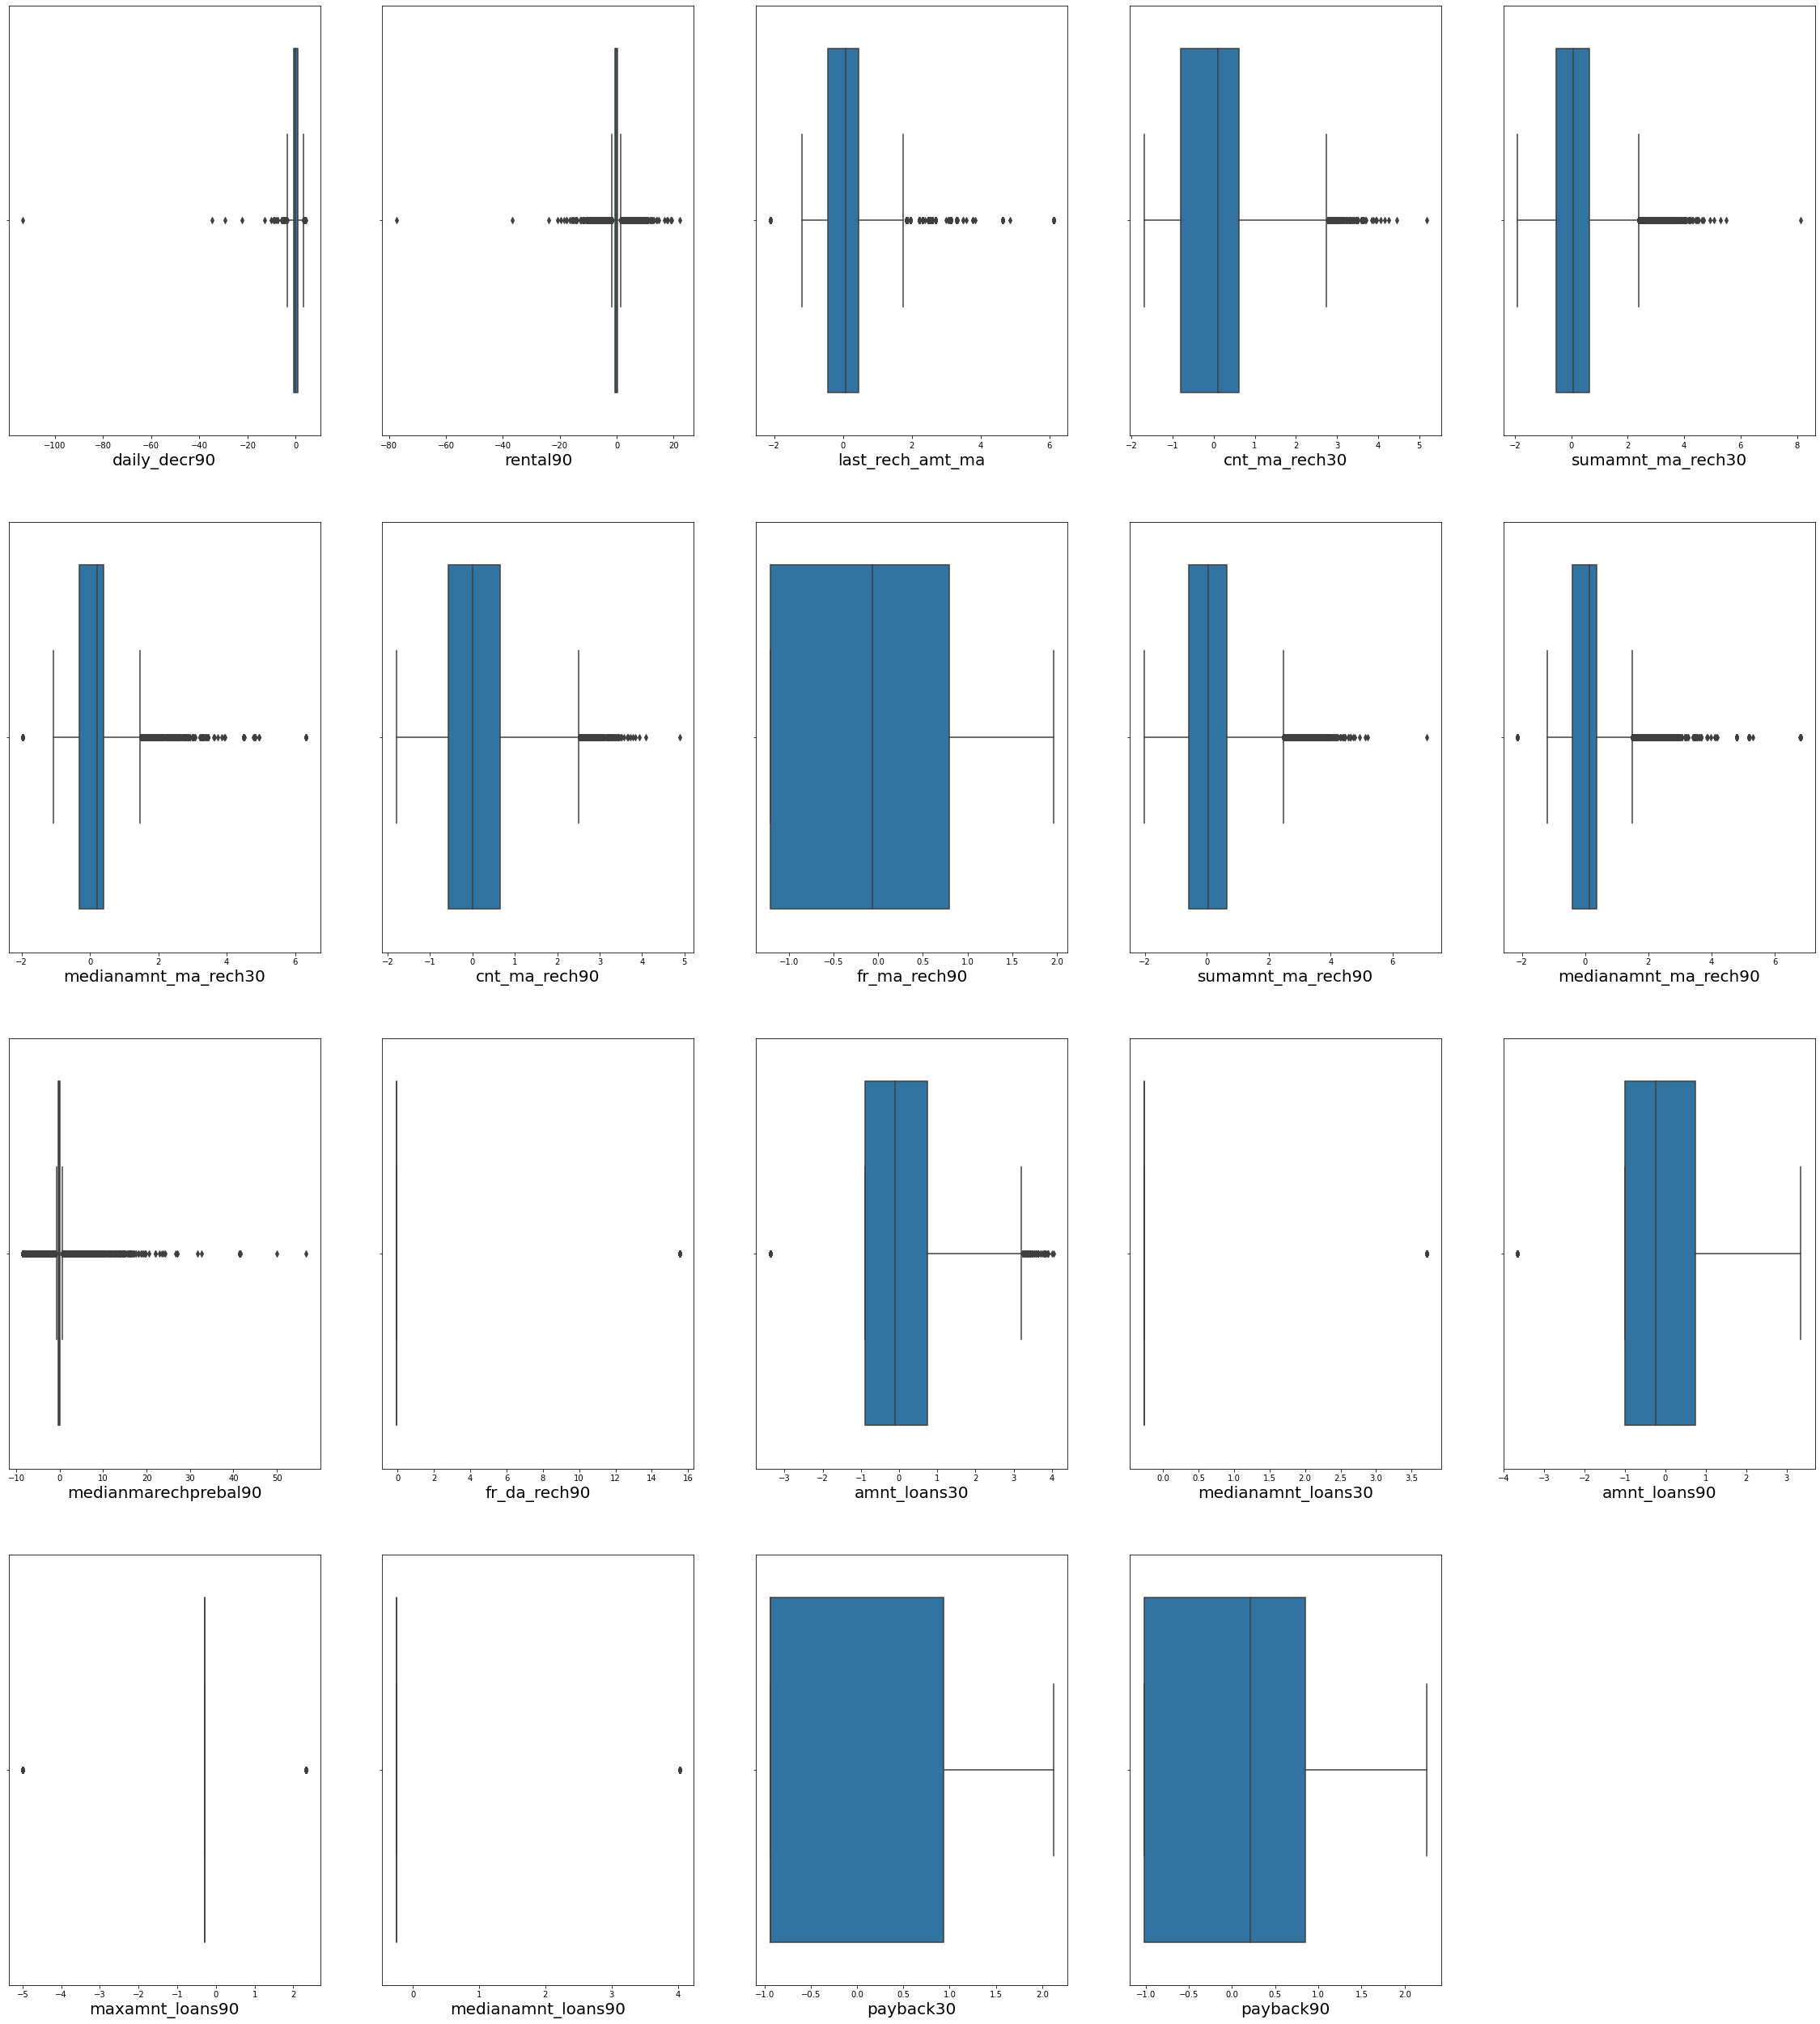

In [57]:
# let's visualize  for outlier


plt.figure(figsize=(40,45))
plotnumber=1
for i in df[feature]:
    if plotnumber<=19:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize= 20)
        
    plotnumber+=1
plt.show()

We can observe that some columns has some amount of outliers like medianmarechprebal90, daily_derc90, rental90, last_rech_amt_ma, sumamnt_ma_rech30, sumamnt_ma_rech90, medianamnt_ma_rech90

In [60]:
# for Outliers Dection and removal we will use Z- Score Method
from scipy import stats
Feature=['medianmarechprebal90', 'daily_decr90', 'rental90', 'last_rech_amt_ma',
         'sumamnt_ma_rech30', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90']
df_out=pd.DataFrame(df[Feature])
z= np.abs(stats.zscore(df_out))
threshold = 3
print(np.where(z>3))

(array([    24,    104,    140, ..., 209560, 209561, 209573], dtype=int64), array([2, 0, 2, ..., 2, 2, 2], dtype=int64))


In [61]:
# Removing outliers from the data frame, and storing final value in df_out Dataframe.
df_out= df[(z<3).all(axis=1)]
df_out.shape                            # checking the shape of dataframe after removing outliers 

(201758, 22)

In [62]:
df.shape

(209593, 22)

The data loss is around 4% which is acceptable, we will move ahead with out clean data, which is df_out.
Let's separate label and features, and scale our data.



# Scaling

In [72]:
# Separating target varibale and features
X= df_out.drop('label', axis=1)
y= df_out.label

print(X.shape)
print(y.shape)

(201758, 20)
(201758,)


In [73]:
# Scaling using Standard Scalar
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # scaling the features using StandardScaler

scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

X_scaled.shape

(201758, 20)

In [74]:
# VIF checking for multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted ,this method help us to identify multicollinearity.

In [75]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,7.713257,daily_decr90
1,1.539628,rental90
2,6.168639,last_rech_amt_ma
3,11.741812,cnt_ma_rech30
4,4.983157,medianamnt_ma_rech30
5,25.776702,cnt_ma_rech90
6,1.343920,fr_ma_rech90
7,26.555171,sumamnt_ma_rech90
8,10.773673,medianamnt_ma_rech90
9,1.166571,medianmarechprebal90


We can see multicollinearity is present in our dataset, let's remove highest score from the list.

In [68]:
# Let's drop sumamnt_ma_rech30 as it shows highest multicollinearity
df_out.drop('sumamnt_ma_rech30', axis=1, inplace= True)


In [76]:
df_out.drop('sumamnt_ma_rech90', axis=1, inplace= True)

In [77]:
# Chceking one more time
X= df_out.drop('label', axis=1)
y= df_out.label

scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,6.709430,daily_decr90
1,1.535708,rental90
2,6.084718,last_rech_amt_ma
3,11.619681,cnt_ma_rech30
4,4.911939,medianamnt_ma_rech30
5,13.293176,cnt_ma_rech90
6,1.341108,fr_ma_rech90
7,7.547338,medianamnt_ma_rech90
8,1.164902,medianmarechprebal90
9,1.010785,fr_da_rech90


Their is still some amount of multicollinearity present in the data, but let's take the next step, and go for model bulding.

# Model Building

In [78]:
# splitting data into train test form
X_train,X_test, y_train,y_test=train_test_split(X_scaled,y,test_size=0.25)


# LogisticRegression

In [79]:
# importing the library
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,precision_score, recall_score

# model
LR= LogisticRegression()


maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

# Determing Best random_state, for maximum accuracy/

for i in range(1,200):
    X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=i)
    LR.fit(X_train,y_train)   #fitting the data will train your model
    Y_pred=LR.predict(X_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    

print("Best accuracy is ", maxAccu, "at random state ", maxRS)


Accuracy  0.8883227597145122 Random state  1
Max accuracy  0.8883227597145122  at random state  1
Accuracy  0.8885606661379857 Random state  2
Max accuracy  0.8885606661379857  at random state  2
Accuracy  0.8863203806502775 Random state  3
Accuracy  0.8858049167327517 Random state  4
Accuracy  0.8890761300555114 Random state  5
Max accuracy  0.8890761300555114  at random state  5
Accuracy  0.8880848532910388 Random state  6
Accuracy  0.8866177636796193 Random state  7
Accuracy  0.8874504361617763 Random state  8
Accuracy  0.8872918318794607 Random state  9
Accuracy  0.8886796193497224 Random state  10
Accuracy  0.888223632038065 Random state  11
Accuracy  0.8878271213322759 Random state  12
Accuracy  0.886340206185567 Random state  13
Accuracy  0.8860824742268041 Random state  14
Accuracy  0.885467882632831 Random state  15
Accuracy  0.8834456780333069 Random state  16
Accuracy  0.885904044409199 Random state  17
Accuracy  0.8874306106264869 Random state  18
Accuracy  0.88624107850911

Accuracy  0.8870737509912767 Random state  172
Accuracy  0.8849722442505947 Random state  173
Accuracy  0.8848731165741475 Random state  174
Accuracy  0.88695479777954 Random state  175
Accuracy  0.8866772402854877 Random state  176
Accuracy  0.8878469468675654 Random state  177
Accuracy  0.8891157811260904 Random state  178
Accuracy  0.888620142743854 Random state  179
Accuracy  0.8875495638382236 Random state  180
Accuracy  0.8885804916732751 Random state  181
Accuracy  0.8882434575733544 Random state  182
Accuracy  0.8856066613798572 Random state  183
Accuracy  0.886340206185567 Random state  184
Accuracy  0.8865979381443299 Random state  185
Accuracy  0.8892942109436954 Random state  186
Accuracy  0.8871530531324345 Random state  187
Accuracy  0.8870737509912767 Random state  188
Accuracy  0.8872918318794607 Random state  189
Accuracy  0.8880650277557494 Random state  190
Accuracy  0.8877676447264076 Random state  191
Accuracy  0.8868754956383822 Random state  192
Accuracy  0.88739

In [80]:
# creating train test split for best random state
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=198)

pred=LR.predict(X_train)
LR_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
LR_acc= accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 88.66%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                       0              1  accuracy      macro avg   weighted avg
precision      0.652682       0.897114  0.886603       0.774898       0.866187
recall         0.221822       0.982901  0.886603       0.602361       0.886603
f1-score       0.331111       0.938050  0.886603       0.634581       0.861255
support    19146.000000  132172.000000  0.886603  151318.000000  151318.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[  4247  14899]
 [  2260 129912]]

=====================Test Result========================
Accuracy Score : 89.04440919904837%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0             1  accuracy     macro avg  weighted avg
precision     0.670283      0.900103  0.890444      0.

In [81]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy

scr= cross_val_score(LR, X_scaled, y,scoring='precision' ,cv=10)
LR_scr=scr.mean()
print("Cross Validation Score For Logistic Regression model : ", LR_scr)

Cross Validation Score For Logistic Regression model :  0.8975194803396432


Here 1 denotes non defaulter while 0 denotes defaulter, although we can see that there is huge disparity between values of 1 and 0 in our dataset. We can do imbalanced data handling technique,however, as it is 0 with lower counts we can either leave it as it is. 





# KNN Classifier

In [82]:
#import library
from sklearn.neighbors import KNeighborsClassifier

#model
KNN= KNeighborsClassifier()

#fit
KNN.fit(X_train,y_train)

#predict
pred=KNN.predict(X_train)
KNN_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {KNN_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=KNN.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
KNN_acc= accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 92.81%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                       0              1  accuracy      macro avg   weighted avg
precision      0.795718       0.941515  0.928059       0.868617       0.923068
recall         0.580435       0.978414  0.928059       0.779425       0.928059
f1-score       0.671237       0.959610  0.928059       0.815424       0.923123
support    19146.000000  132172.000000  0.928059  151318.000000  151318.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[ 11113   8033]
 [  2853 129319]]

=====================Test Result========================
Accuracy Score : 90.82672482157018%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0             1  accuracy     macro avg  weighted avg
precision     0.682668      0.930026  0.908267      0.

In [83]:
# Cross validation
scr= cross_val_score(KNN, X_scaled, y,scoring='precision', cv=10)
KNN_scr=scr.mean()
print("Cross Validation Score For KNeighborsClassifier model : ", KNN_scr)

Cross Validation Score For KNeighborsClassifier model :  0.9291016773507181


# Ensemble Technique

In [84]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier()

RF.fit(X_train,y_train)
pred=RF.predict(X_train)
RF_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=RF.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
RF_acc=accuracy_score(y_test,y_pred)

=====================Train Result========================
Accuracy Score : 99.90%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                       0              1  accuracy      macro avg   weighted avg
precision      0.994018       0.999727  0.999002       0.996873       0.999005
recall         0.998120       0.999130  0.999002       0.998625       0.999002
f1-score       0.996065       0.999429  0.999002       0.997747       0.999003
support    19146.000000  132172.000000  0.999002  151318.000000  151318.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[ 19110     36]
 [   115 132057]]

=====================Test Result========================
Accuracy Score : 92.04797779540047%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0             1  accuracy     macro avg  weighted avg
precision     0.764608      0.934737   0.92048      0.

In [85]:
# Cross validation
scr= cross_val_score(RF,X_scaled,y,scoring='precision', cv=10)
RF_scr=scr.mean()
print("Cross validation Score of RandomForestClassifier model is : ", RF_scr)

Cross validation Score of RandomForestClassifier model is :  0.933999638414868


In [92]:
# Hyper Parameter Tunning Randome forest Classifier
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
#creating parameter list to pass in GridSearchCV
parameters={'max_features': ['auto','sqrt','log2'],
           'n_estimators': [10,50,70,100],
            'max_depth': range(5,10,15),
            'criterion': ['gini','entropy']}

GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring= "accuracy")
GCV.fit(X_train,y_train)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 10}

In [93]:
GCV_pred=GCV.best_estimator_.predict(X_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)   # checking the accuracy

0.9044607454401269

In [94]:
precision_score(y_test,GCV_pred)

0.9042153460772437

From above we can say that we further need to decide on parameter range, but over all the scores looks good, it can be over model.

# Boosting

In [86]:
# Model
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()

#fit
GBC.fit(X_train, y_train)

pred=GBC.predict(X_train)
GBC_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {GBC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=GBC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
GBC_acc=accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 91.82%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                       0              1  accuracy      macro avg   weighted avg
precision      0.783593       0.929668  0.918159       0.856631       0.911185
recall         0.487935       0.980480  0.918159       0.734207       0.918159
f1-score       0.601390       0.954398  0.918159       0.777894       0.909733
support    19146.000000  132172.000000  0.918159  151318.000000  151318.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[  9342   9804]
 [  2580 129592]]

=====================Test Result========================
Accuracy Score : 91.87153053132434%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0             1  accuracy     macro avg  weighted avg
precision     0.775526      0.930708  0.918715      0.

In [87]:
# Cross validation
scr= cross_val_score(GBC,X_scaled,y,scoring='precision', cv=10)
GBC_scr=scr.mean()
print("Cross validation Score of GradientBoosting Classifier model is : ", GBC_scr)

Cross validation Score of GradientBoosting Classifier model is :  0.9296827334674804


In [95]:
# Hyper parameter tuning for GradientBoosting Classifier by using RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# creating list of parameters

grid_param={ 'max_depth': range(3,13),
           'min_samples_split': range(2,8,2),
           'learning_rate': np.arange(0.1, 0.5,1.0),
           'loss' : ['log_loss', 'deviance', 'exponential']}

rnd_srch = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions= grid_param)
#fit
rnd_srch.fit(X_train,y_train)
rnd_srch.best_params_    # finding best parameters



{'min_samples_split': 4,
 'max_depth': 6,
 'loss': 'log_loss',
 'learning_rate': 0.1}

In [96]:
rnd_pred=rnd_srch.best_estimator_.predict(X_test)
print(f" Precision is : {precision_score(y_test,rnd_pred)}")
print(f" Accuracy score is : {accuracy_score(y_test,rnd_pred)}")
      

 Precision is : 0.9372463044563589
 Accuracy score is : 0.9225812846946868


We can observe that both precision and accuracy increases by doing hyper parameter tuning, I think we are in the right direction, this can be our model. As we don't observe any over fitting or underfitting here in this algorithm. GradientBoostingClassifier could be our final Model.

Let's Move ahead and build one more model before deciding on final model.

# SVC

In [88]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_train)
svc_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")
svc_acc=accuracy_score(y_test,y_pred)


=====================Train Result========================
Accuracy Score : 90.95%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                       0              1  accuracy      macro avg   weighted avg
precision      0.782185       0.918158  0.909482       0.850172       0.900954
recall         0.394443       0.984089  0.909482       0.689266       0.909482
f1-score       0.524426       0.949981  0.909482       0.737204       0.896136
support    19146.000000  132172.000000  0.909482  151318.000000  151318.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[  7552  11594]
 [  2103 130069]]

=====================Test Result========================
Accuracy Score : 91.10428231562253%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                      0             1  accuracy     macro avg  weighted avg
precision     0.780503      0.919706  0.911043      0.

In [89]:
# Cross validation

scr= cross_val_score(svc,X_scaled,y,scoring= 'precision', cv=10)
svc_scr=scr.mean()
print("Cross validation Score of SVC model is : ", scr.mean())

Cross validation Score of SVC model is :  0.9184921792972942


In [ ]:
# Hyper parameter tuning
SVC()

# selecting for parameters
param_grid= { 'C': [1,3,5,10],
            'gamma' : [.001,.01,.002,.02,.1]}
rnd_srch = RandomizedSearchCV(SVC(), param_distributions= param_grid)
#fit
rnd_srch.fit(X_train,y_train)           # fitting data into model
rnd_srch.best_params_    # finding best parameters



In [ ]:
rnd_pred=rnd_srch.best_estimator_.predict(X_test)           #predicting using best parameter

# printing scores
print(f" Precision is : {precision_score(y_test,rnd_pred)}")
print(f" Accuracy score is : {accuracy_score(y_test,rnd_pred)}")
      

Summarizing all the model.

In [90]:
# summarizing the Models on the basis of accuracy  and cross validation using presion as scoring.
# we are taking precision as the cross validation parameter as we want to know how correctly our model is able to detect the class

Accuracy=[LR_acc, KNN_acc, RF_acc, GBC_acc, svc_acc]
Cross_valid=[LR_scr,KNN_scr, RF_scr, GBC_scr, svc_scr]


Model= pd.DataFrame({
    'Models':['Logistic Regression','KNeighbors Classifier', 'Random Forest Classifier',
              'GradientBoostingClassifier', 'SVC'], 
    'Accuracy Score': Accuracy, 
    'Cross Validation Score(Precision)': Cross_valid})

Model.sort_values(by ='Cross Validation Score(Precision)', ascending = False )

,Models,Accuracy Score,Cross Validation Score(Precision)
2,Random Forest Classifier,0.920480,0.934000
3,GradientBoostingClassifier,0.918715,0.929683
1,KNeighbors Classifier,0.908267,0.929102
4,SVC,0.911043,0.918492
0,Logistic Regression,0.890444,0.897519


From above observation we can say that RandomForest Classifier is our final Model, as it has both highest Accuracy score as well as highest precision score(cross validation).

Let's go ahead and save our model

# Saving the Model


In [ ]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(GBC, "Micro_Credit_Loan_Defaulter.pkl")